# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

(-0.5, 63.5, 63.5, -0.5)

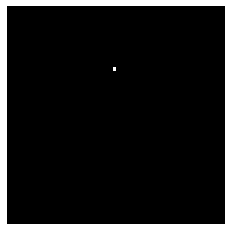

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
H, theta, rho = hough_line(im)

In [3]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

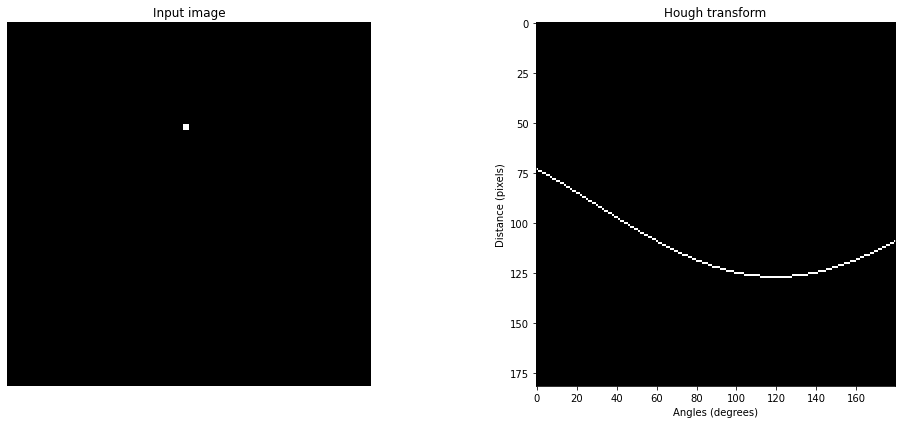

In [4]:
show_hough(H, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?

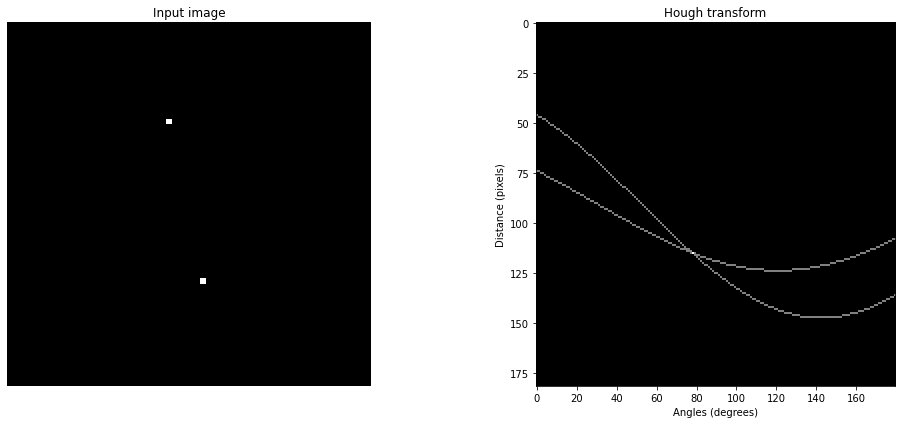

In [5]:
im2 = np.zeros((64,64), dtype=np.uint8)

im2[17, 28] = 1
im2[45, 34] = 1


H2, theta2, rho2 = hough_line(im2)
show_hough(H2, im2)

6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha

In [6]:
def gen_random_colinear_points(a, b, minimum, maximum, n = 10):
    return [(int(a * x + b), x) for x in np.random.randint(minimum,maximum,10)]

[(11, 13), (28, 47), (35, 60), (26, 42), (10, 11), (35, 61), (26, 42), (11, 12), (16, 23), (12, 15)]


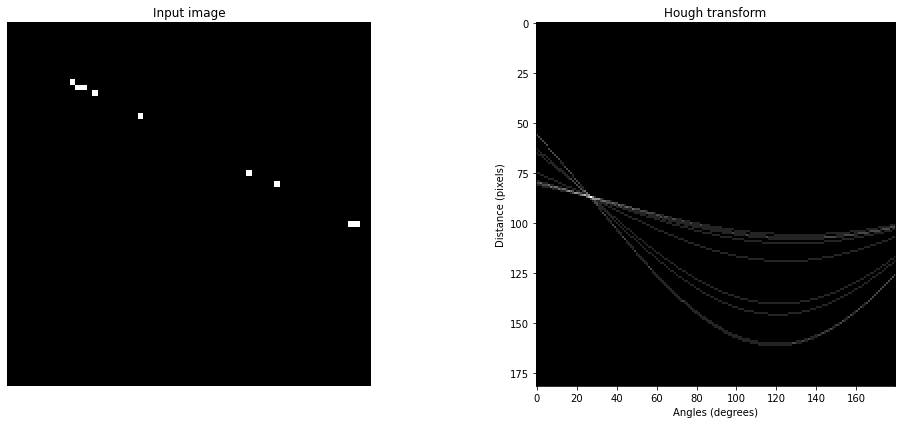

In [7]:
im2 = np.zeros((64,64), dtype=np.uint8)

points = gen_random_colinear_points(0.5, 5,1,63)
print(points)
for p in points:
    im2[p] = 1


H2, theta2, rho2 = hough_line(im2)
show_hough(H2, im2)

7. Poeksperymentuj z różnymi układami punktów

[(10, 10), (10, 17), (10, 25), (17, 25), (27, 25), (27, 27), (27, 28), (27, 45), (27, 50)]


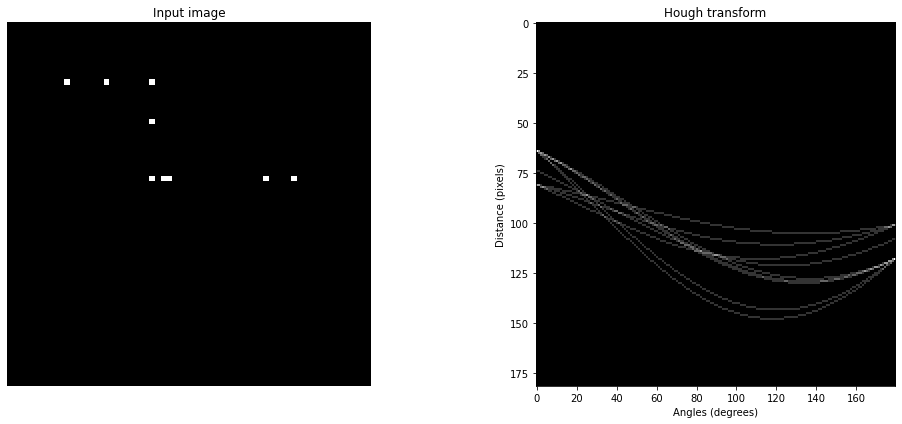

In [8]:
im3 = np.zeros((64,64), dtype=np.uint8)

points = [(10,10),(10,17),(10, 25),(17, 25),(27, 25),(27, 27),(27, 28),(27, 45),(27, 50)]
print(points)
for p in points:
    im3[p] = 1


H3, theta3, rho3 = hough_line(im3)
show_hough(H3, im3)

[(30, 20), (33, 23), (40, 30), (28, 18), (25, 15), (32, 22), (36, 26), (29, 19), (24, 14), (22, 12), (21, 30), (18, 18), (23, 43), (23, 41), (19, 20), (22, 35), (22, 37), (21, 34), (21, 30), (22, 35), (-26, 38), (-36, 48), (-33, 45), (-37, 49), (-26, 38), (-33, 45), (-33, 45), (-33, 45), (-23, 35), (-37, 49)]


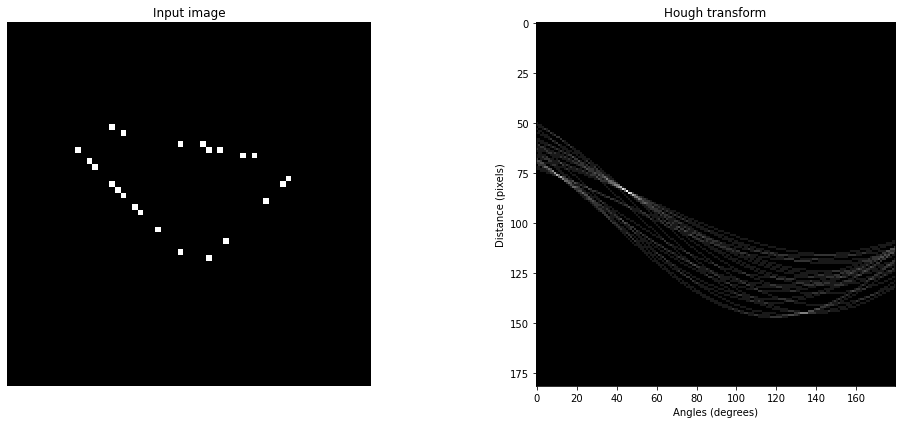

In [9]:
im4 = np.zeros((64,64), dtype=np.uint8)

points = gen_random_colinear_points(1, 10, 10, 32) + gen_random_colinear_points(0.2, 15, 10, 50) + gen_random_colinear_points(-1, 12, 35, 50) 
print(points)
for p in points:
    im4[p] = 1


H4, theta4, rho4 = hough_line(im4)
show_hough(H4, im4)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]

In [11]:
squares_img = cv2.imread("kwadraty.png", cv2.IMREAD_GRAYSCALE)

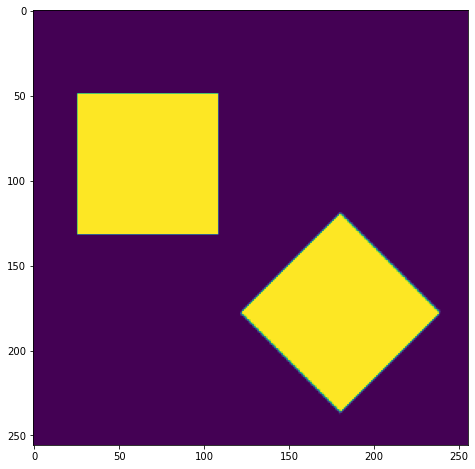

In [12]:
plt.imshow(squares_img)

In [13]:
squares_blurred = cv2.GaussianBlur(squares_img, (3,3), 0)

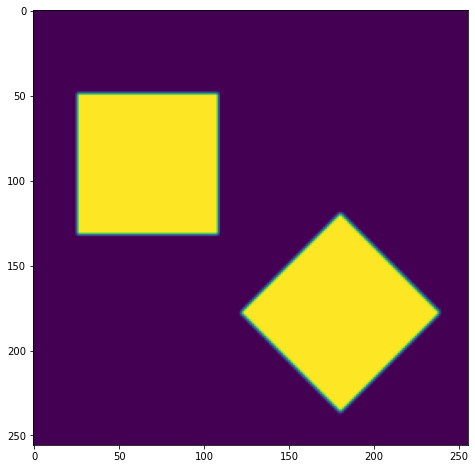

In [14]:
plt.imshow(squares_blurred)

In [15]:
squares_edges = cv2.Canny(squares_blurred, 30, 60, None, 3, 1)

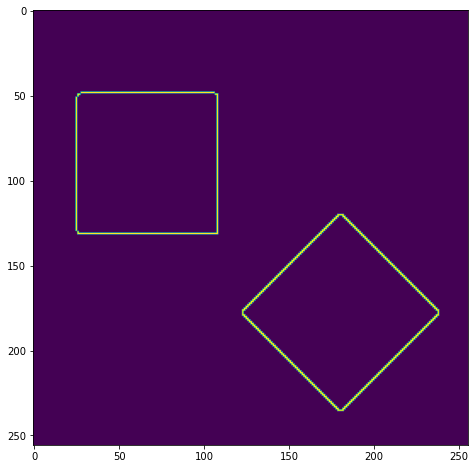

In [16]:
plt.imshow(squares_edges)

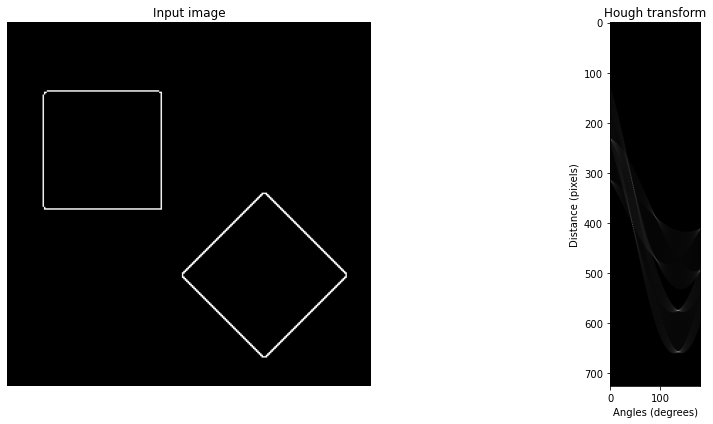

In [17]:
H_squares, theta_squares, rho_squares = hough_line(squares_edges)
show_hough(H_squares, squares_edges)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [18]:
maxima = hough_line_peaks(*hough_line(squares_edges))

In [19]:
maxima

(array([92, 87, 79, 78, 76, 76, 74, 63], dtype=uint64),
 array([-0.78101046,  1.57079633,  1.57079633, -0.79856126,  0.78101046,
        -0.0087754 ,  0.0087754 ,  0.79856126]),
 array([-37.55172414, 131.68137931,  48.56689655,  40.55586207,
        212.79310345, 107.64827586,  26.53655172, 294.9062069 ]))

<ipython-input-20-8a12098895b4>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


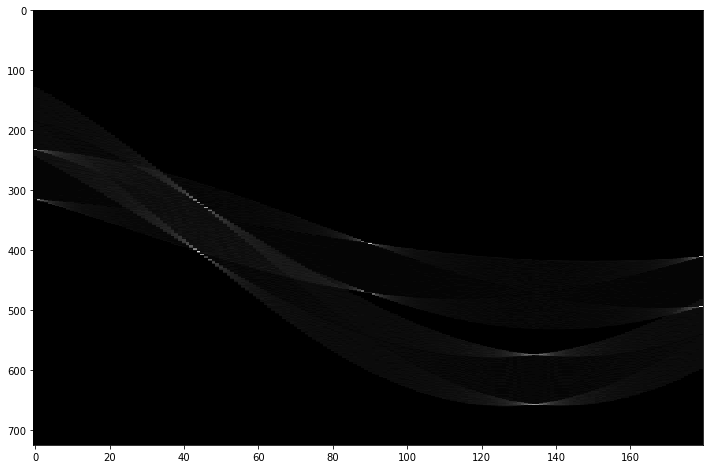

In [20]:

fig,ax = plt.subplots(1)
ax.imshow(H_squares, 'gray', interpolation='nearest', aspect='auto') # gdzie H jest przestrzenią Hougha
fig.show()

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

In [21]:
maxima[1]

array([-0.78101046,  1.57079633,  1.57079633, -0.79856126,  0.78101046,
       -0.0087754 ,  0.0087754 ,  0.79856126])

In [22]:
def getCoords(angle, rho):
    angle += np.pi / 2
    angle_degrees = angle * 180 / np.pi
    return angle_degrees, rho

In [23]:
getCoords( - np.pi / 2, 1)

(0.0, 1)

In [24]:
H_squares.shape[0]

726

<ipython-input-25-b4435efd0a9f>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


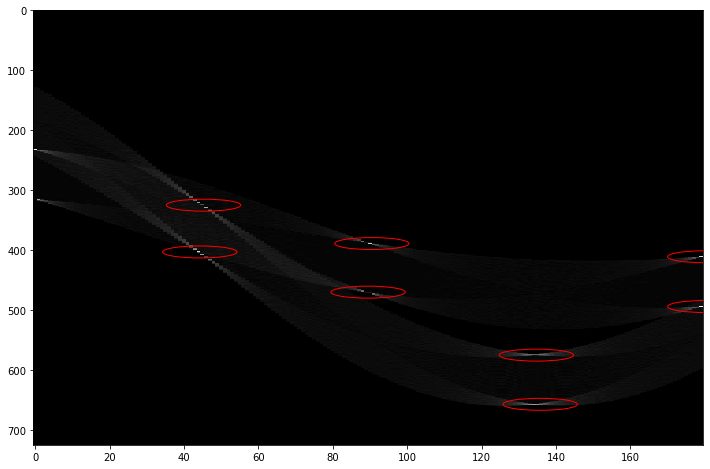

In [25]:
fig,ax = plt.subplots(1)
ax.imshow(H_squares, 'gray', interpolation='nearest', aspect='auto') # gdzie H jest przestrzenią Hougha
for angle, rho in zip(maxima[1], maxima[2]):
#     print(angle, rho)
    x, y = getCoords(angle, rho)
    y += H_squares.shape[0] / 2
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)
fig.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [26]:
lines = cv2.HoughLines(squares_edges,1,np.pi/180, 50)

In [27]:
lines

array([[[131.        ,   1.5707964 ]],

       [[108.        ,   0.        ]],

       [[ 25.        ,   0.        ]],

       [[ 48.        ,   1.5707964 ]],

       [[-39.        ,   2.338741  ]],

       [[-48.        ,   2.3736477 ]],

       [[ 35.        ,   2.3736477 ]],

       [[212.        ,   0.7679449 ]],

       [[212.        ,   0.80285144]],

       [[ 44.        ,   2.338741  ]],

       [[132.        ,   1.553343  ]],

       [[130.        ,   1.5882496 ]],

       [[ 40.        ,   2.3561945 ]],

       [[ 49.        ,   1.553343  ]],

       [[ 47.        ,   1.5882496 ]],

       [[294.        ,   0.7853982 ]],

       [[-43.        ,   2.3561945 ]]], dtype=float32)

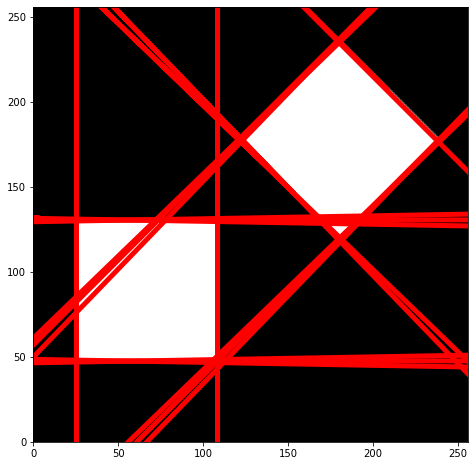

In [28]:
squares_color = cv2.imread("kwadraty.png")
plt.imshow(squares_color)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))  
    
    plt.plot([x0, x1, x2], [y0, y1, y2], color='red', linewidth=5)
plt.xlim(0, squares_color.shape[0])
plt.ylim(0, squares_color.shape[1])
    
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

In [29]:
linesP = cv2.HoughLinesP(squares_edges,1,np.pi/180, 50)

In [30]:
linesP[0]

array([[108, 131, 108,  49]], dtype=int32)

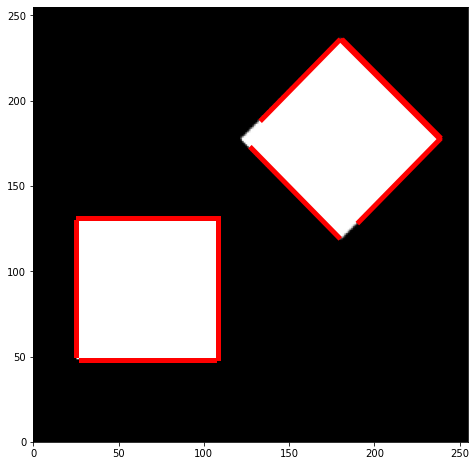

In [31]:
squares_color = cv2.imread("kwadraty.png")
plt.imshow(squares_color)

for line in linesP:
    x1, y1, x2, y2 = line[0]
    
    plt.plot([x1, x2], [y1, y2], color='red', linewidth=5)
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

Text(0.5, 1.0, 'Obraz oryginalny')

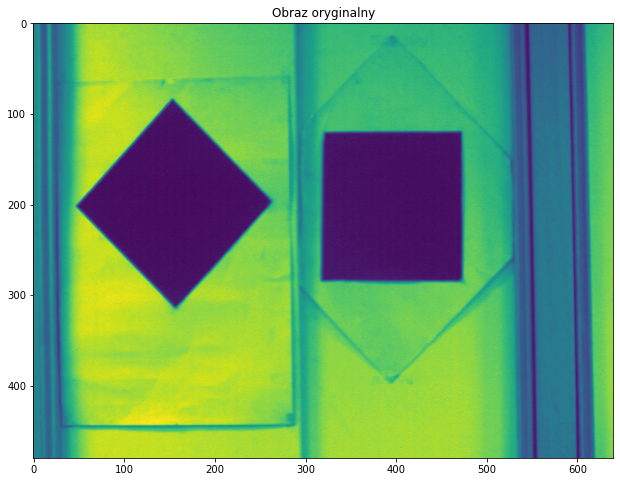

In [32]:
lab112_img = cv2.imread("lab112.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(lab112_img)
plt.title("Obraz oryginalny")

In [33]:
lab112_img

array([[ 98,  98,  95, ..., 137, 139, 141],
       [ 97,  97,  97, ..., 138, 139, 139],
       [ 98,  97,  98, ..., 139, 141, 139],
       ...,
       [ 99,  97,  97, ..., 160, 161, 164],
       [ 98,  99,  97, ..., 154, 160, 166],
       [ 97,  98,  97, ..., 163, 161, 163]], dtype=uint8)

Text(0.5, 1.0, 'Obraz przefiltrowany')

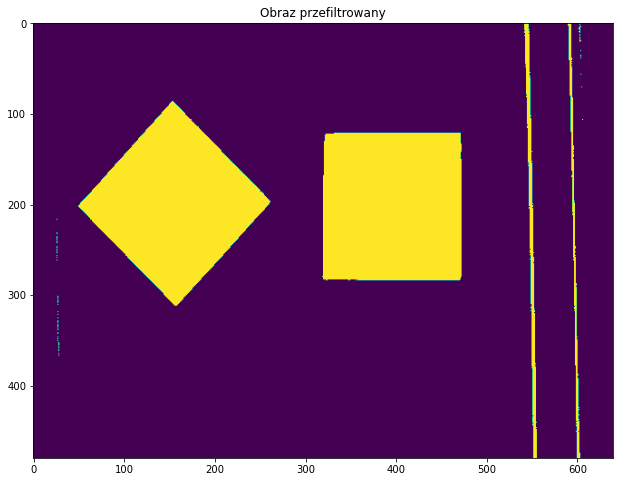

In [34]:
lab112_img_filtered = (lab112_img < 50).astype('uint8')
plt.imshow(lab112_img_filtered)
plt.title("Obraz przefiltrowany")

Text(0.5, 1.0, 'Obraz po otwarciu')

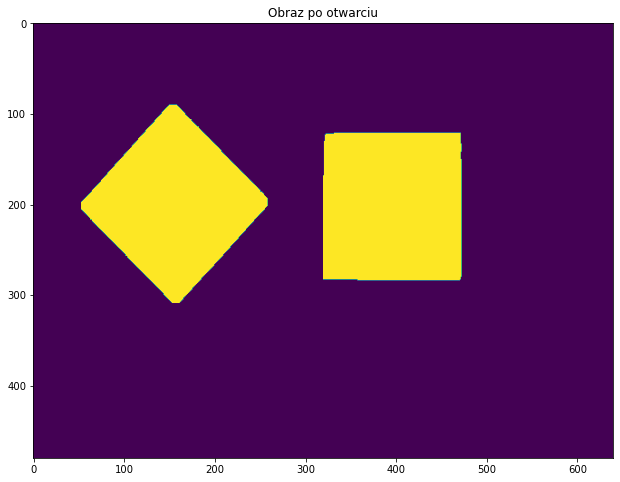

In [35]:
lab112_img_opened = cv2.morphologyEx(lab112_img_filtered, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(9,9)))
plt.imshow(lab112_img_opened)
plt.title("Obraz po otwarciu")

Text(0.5, 1.0, 'Obraz po rozmyciu')

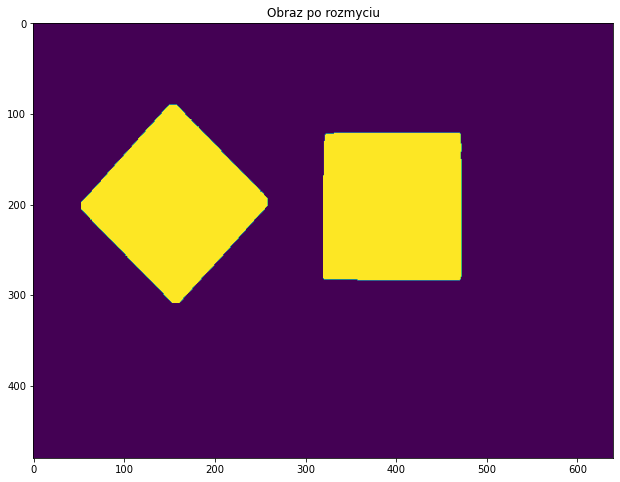

In [36]:
lab112_img_blurred = cv2.GaussianBlur(lab112_img_opened, (5, 5), 0)
plt.imshow(lab112_img_blurred)
plt.title("Obraz po rozmyciu")

Text(0.5, 1.0, 'Obraz po wykryciu krawędzi')

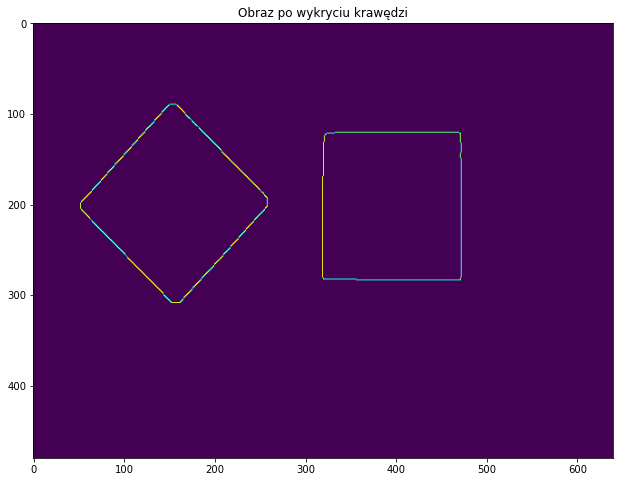

In [37]:
lab112_img_edges = cv2.Canny(lab112_img_blurred, 1, 1, None, 3, 1)
plt.imshow(lab112_img_edges)
plt.title("Obraz po wykryciu krawędzi")

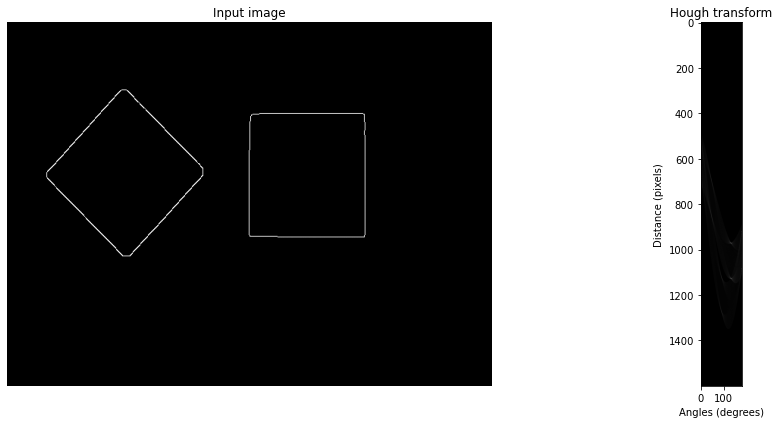

In [38]:
show_hough(hough_line(lab112_img_edges)[0], lab112_img_edges)

<ipython-input-39-5b1e7459c81e>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


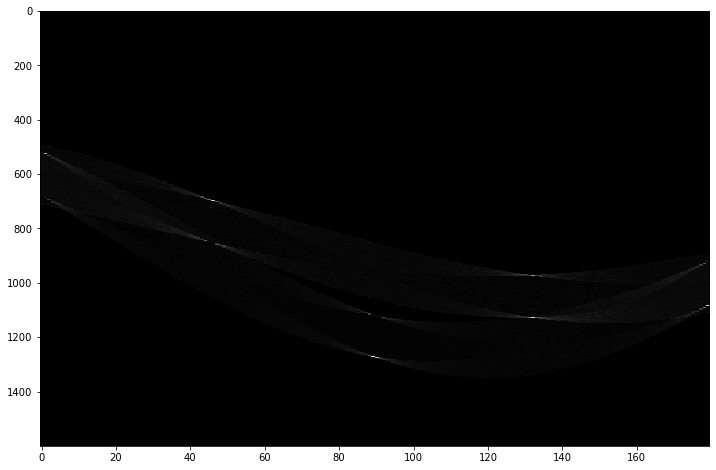

In [39]:
fig,ax = plt.subplots(1)
ax.imshow(hough_line(lab112_img_edges)[0], 'gray', interpolation='nearest', aspect='auto') # gdzie H jest przestrzenią Hougha
fig.show()

In [40]:
lab112_maxima = hough_line_peaks(*hough_line(lab112_img_edges))
lab112_maxima_H = hough_line(lab112_img_edges)[0]

<ipython-input-41-c426ea6343cd>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


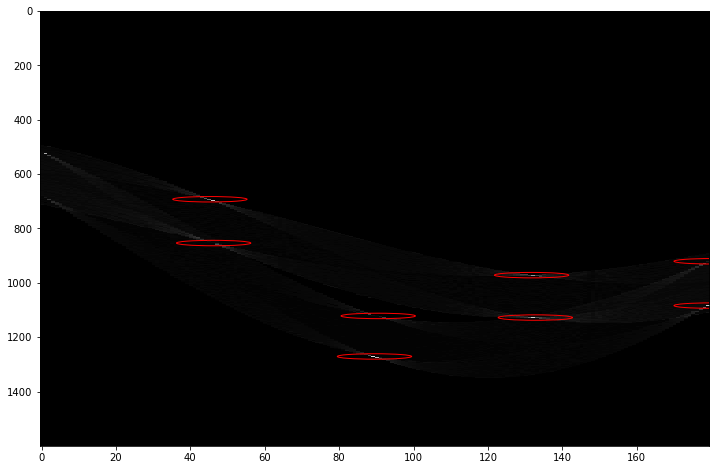

In [41]:
fig,ax = plt.subplots(1)
ax.imshow(hough_line(lab112_img_edges)[0], 'gray', interpolation='nearest', aspect='auto') # gdzie H jest przestrzenią Hougha
for angle, rho in zip(lab112_maxima[1], lab112_maxima[2]):
#     print(angle, rho)
    x, y = getCoords(angle, rho)
    y += lab112_maxima_H.shape[0] / 2
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)
fig.show()

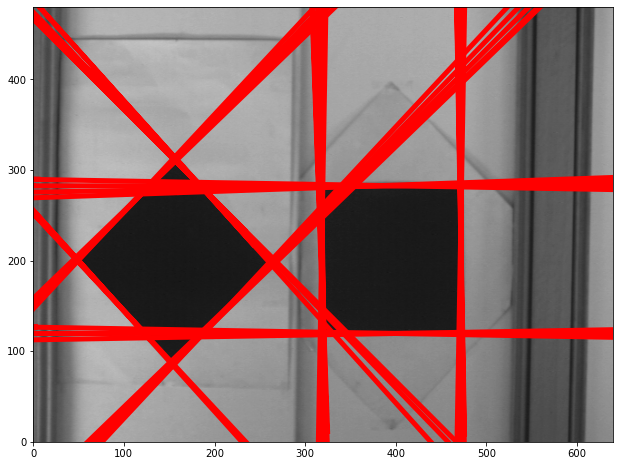

In [42]:
lab112_lines = cv2.HoughLines(lab112_img_edges,1,np.pi/180, 50)

lab112_color = cv2.imread("lab112.png")
plt.imshow(lab112_color)

for line in lab112_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))  
    
    plt.plot([x0, x1, x2], [y0, y1, y2], color='red', linewidth=5)
plt.xlim(0, lab112_color.shape[1])
plt.ylim(0, lab112_color.shape[0])
    
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

Text(0.5, 1.0, 'Obraz oryginalny')

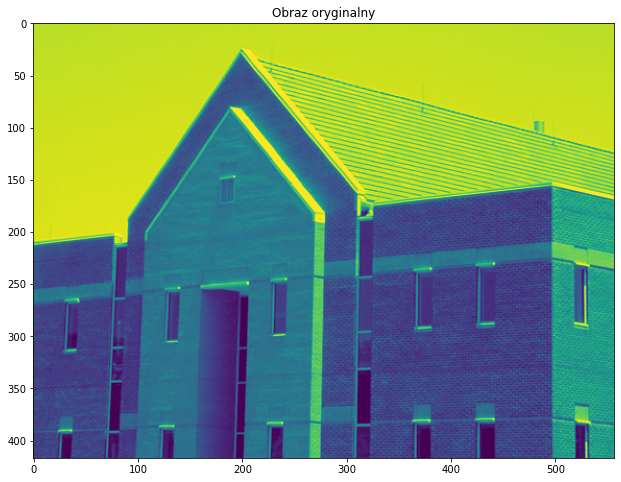

In [43]:
house_img = cv2.imread("dom.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(house_img)
plt.title("Obraz oryginalny")

Text(0.5, 1.0, 'Obraz po rozmyciu')

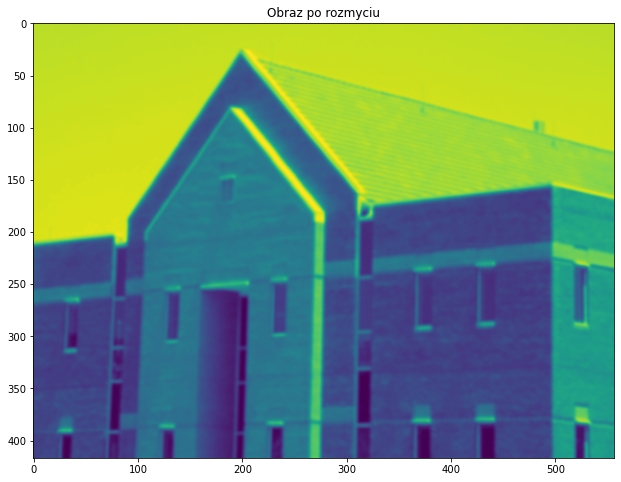

In [44]:
house_img_blurred = cv2.GaussianBlur(house_img, (7, 7), 0)
plt.imshow(house_img_blurred)
plt.title("Obraz po rozmyciu")

Text(0.5, 1.0, 'Obraz po wykryciu krawędzi')

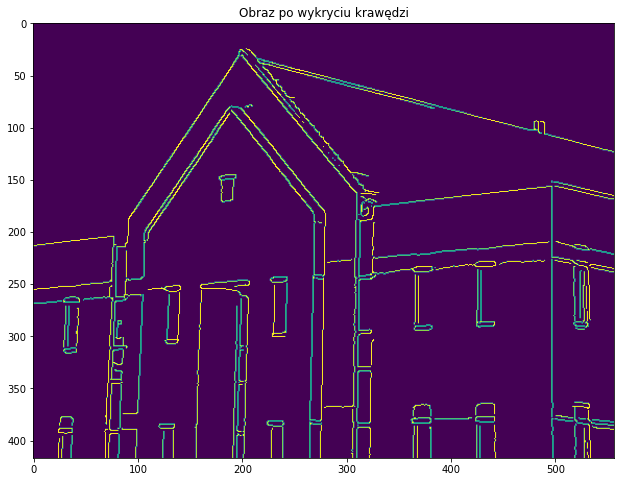

In [45]:
house_img_edges = cv2.Canny(house_img_blurred, 30, 60, None, 3, 1)
plt.imshow(house_img_edges)
plt.title("Obraz po wykryciu krawędzi")

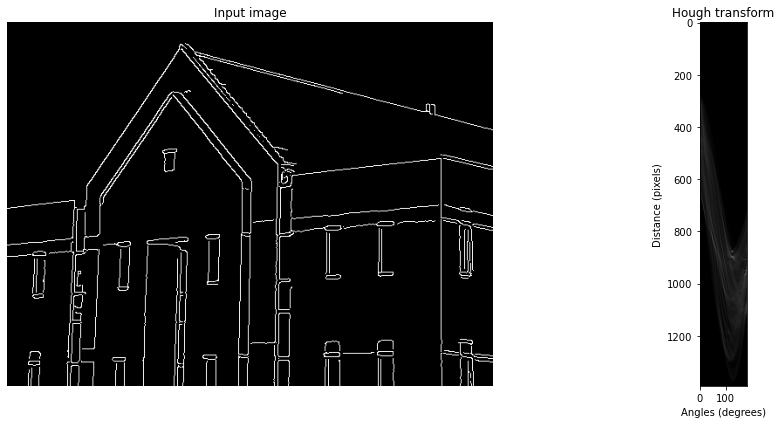

In [46]:
show_hough(hough_line(house_img_edges)[0], house_img_edges)

In [47]:
house_linesP = cv2.HoughLinesP(house_img_edges,1,np.pi/180, 10)

In [48]:
house_linesP.shape

(1119, 1, 4)

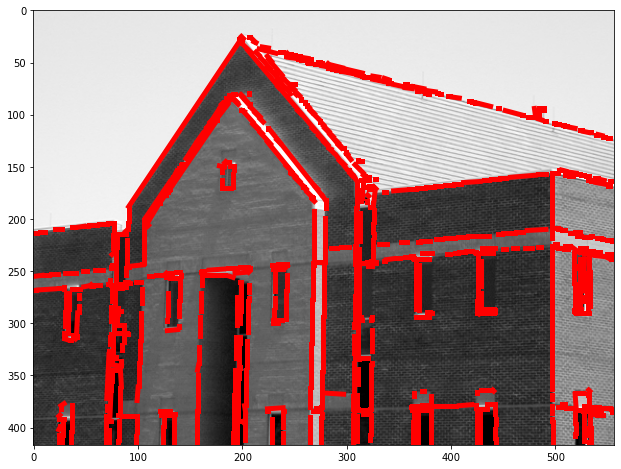

In [49]:
house_color = cv2.imread("dom.png")
plt.imshow(house_color)

for line in house_linesP:
    x1, y1, x2, y2 = line[0]
    
    plt.plot([x1, x2], [y1, y2], color='red', linewidth=5)
    
plt.show()